### Algorithm DDPG
****
Randomly initialize critic network $Q(s,a|\theta^Q)$ and actor $\mu(s|\theta^\mu)$ with weights $\theta^Q$ and $\theta^\mu$<br>
initialize target network $Q'$ and $\mu'$ with weights $\theta^{Q'}\leftarrow \theta^Q, \theta^{\mu'} \leftarrow \theta^\mu$<br>
Initialize replay buffer $R$<br>
**for** episode = 1, M **do**<br>
&nbsp;&nbsp;&nbsp;Initialize a random process $N$ for action exploration<br>
&nbsp;&nbsp;&nbsp;Receive initial observation state $s_1$<br>
&nbsp;&nbsp;&nbsp;**for** t=1, T **do**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Select action $a_t=\mu(s_t|\theta^\mu)+N_t$ according to the current policy and exploration noise<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Excute action $a_t$ and observe reward $r_t$ and observe new state $s_{t+1}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Store transition $(s_t,a_t,r_t,s_{t+1})$ in $R$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Sample a random minibatch of $N$ transitions $(s_i,a_i,r_i,s_{i+1})$ from $R$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Set $y_i=r_i+\gamma Q'(s_{i+1},\mu'(s_{i+1}|\theta^{\mu'})|\theta^{Q'})$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Update critic by minimizing the loss: $L=\frac{1}{N}\sum_i(y_i-Q(s_i,a_i|\theta^Q))^2$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Update the actor policy using the sampled policy gradient:
$$
\nabla_{\theta^\mu}J\approx\frac{1}{N}\sum_i\nabla_aQ(s,a|\theta^Q)|_{s=s_i,a=\mu(s_i)}\nabla_{\theta^\mu}\mu(s|\theta^\mu)|s_i
$$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ubdate the target network:
$$
\theta^{Q'}\leftarrow \tau \theta^Q +(1-\tau)\theta^{Q'}\\
\theta^{\mu'}\leftarrow \tau \theta^\mu+(1-\tau)\theta^{\mu'}
$$
&nbsp;&nbsp;&nbsp;**end for**<br>
**end for**<br>

tips : $\mu$ 表示确定策略<br>
<br>
### 代码表示Loss的计算:<br>
* #### Critic Loss :
$$
\frac{1}{N} \sum_i \overbrace{reward+(1.0-done) * gamma * target\_value\_net(next\_state, target\_policy\_net(next\_state))}^{target\_value}- \underbrace{value\_net(state, action)}_{value}
$$
* #### Policy Loss :
$$
\frac{1}{N} \sum_i value\_net(state, policy(state))
$$

### 根据上边伪代码整理出以下表格:

<center><style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#bbb;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-top-width:1px;border-bottom-width:1px;border-color:#bbb;color:#594F4F;background-color:#E0FFEB;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-top-width:1px;border-bottom-width:1px;border-color:#bbb;color:#493F3F;background-color:#9DE0AD;}
.tg .tg-koh6{font-size:36px;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-7ab7{font-weight:bold;font-size:36px;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-bwtg{font-size:36px;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-n9dp{background-color:#C2FFD6;font-size:36px;border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-7ab7">Algorithm</th>
    <th class="tg-7ab7">Neural Network</th>
    <th class="tg-7ab7">input</th>
    <th class="tg-7ab7">output</th>
  </tr>
  <tr>
    <td class="tg-bwtg" rowspan="2">Critic</td>
    <td class="tg-n9dp">target critic network<br>θ^Q'</td>
    <td class="tg-koh6">next state s_{i+1} &amp;&amp;<br>the action a_{i+1} of s_{i+1} through θ^𝜇'</td>
    <td class="tg-n9dp">Q'(s_{i+1},a_{i+1})<br><big><big>for critic loss</big></big></td>
  </tr>
  <tr>
    <td class="tg-n9dp">critic network<br>θ^Q</td>
    <td class="tg-koh6">current state s_i &amp;&amp;<br>action in current state a_i</td>
    <td class="tg-n9dp">Q(s_i,a_i) <br><big><big>for critic loss and <br>policy loss</big></big></td>
  </tr>
  <tr>
    <td class="tg-bwtg" rowspan="2">Actor</td>
    <td class="tg-n9dp">target actor network<br> θ^𝜇'</td>
    <td class="tg-koh6">next state s_{i+1}</td>
      <td class="tg-n9dp">action a_{i+1} at<br>state s_{i+1}<br><big><big>for critic loss</big></big></td>
  </tr>
  <tr>
    <td class="tg-n9dp">actor network <br>θ^𝜇</td>
    <td class="tg-koh6">current state s_i</td>
    <td class="tg-n9dp">𝜇(s_i)<br><big><big> for policy loss</big></big></td>
  </tr>
</table></center>

<img src="../assets/DDPG_landscape.png" width=600 />

### 特性总结
1. 类似于DQN的replay buffer
2. 类似于DQN的target network但此处更新的时候采用soft update
3. 使用Actor_net输入s&&s'选择动作a&&a'分别用来更新actor_net和Q_net，使用Q_net输入a&&a'分别用来评估(s,a)和(s',a')来更新actor_net和Q_net
4. 适用于处理连续动作空间(可以将离散动作空间理解为连续动作空间的特例)
5. 标准化动作空间,对action 增加噪声
6. actor-critic思想，但计算loss function的时候和A2C有很大不同<br>
    a. A2C里的Critic loss $\leftrightarrow$ TD error $\leftrightarrow$ advantage function<br>
    因为$\hat{A}(s,a)=Q(s,a)-V(s)$是TD error的无偏估计。<br>
    而DDPG里critic的计算和DoubleDQN很像，只不过计算target_Q的$a_{i+1}$是用网络$\theta^{\mu'}$所得的<br>
    b.DDPG计算actor loss的时候估计是为了减少计算量，所以使用的是Q(s,a)而不是A(s,a)

### Code Tips:
**np.clip $\leftrightarrow$ torch.clamp <br>**
$y_i = \begin{cases}
        \text{min} & \text{if } x_i < \text{min} \\
        x_i & \text{if } \text{min} \leq x_i \leq \text{max} \\
        \text{max} & \text{if } x_i > \text{max}
    \end{cases}$<br>
    <br>
**torch.detach() , torch.data:<br>**
都是将自动微分截断，也就是进行requires_grad=False操作<br>
推荐使用detach()，可以对微分进行追踪<br>
DDPG这里，将target_Q.detach()保证只更新value_net<br>
<br>
**Policy_net输出未加F.tanh()**<br>
将动作空间控制在-1~+1哇完了<br>
tanh公式为:<br>
$\text{Tanh}(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
<img src="../assets/TanhReal.gif">

MountainCarContinuous-v0:感觉该环境可以考虑用HER解决<br>
但是我加的噪声是相同的量，就会永远给小车一个向前或者向后的推力,但是这样操作。减少step的话就会没有效果<br>
假设这个力是向前的(因为我们最终需要到达对面的山顶)，那么我就可以保持在推力的方向上施加一个向量<br>
这个向量有什么作用呢?它可以让我永远是向着目标前进的，即使奖励值很稀疏。但我能sample出十分有用的信息<br>
那么问题来了?我要怎么去求这个单位向量，或者说怎么去拟合这个单位向量。nn?<br>

In [1]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Normal
# from torch.utils.tensorboard import SummaryWriter
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import pdb
%matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# 经验回放
class ReplayBuffer:
    def __init__(self, column, batch_size, buffer_size):
        self.current_state = np.zeros((buffer_size, column), dtype=np.float32)
        self.next_state = np.zeros((buffer_size, column), dtype=np.float32)
        init = lambda buffer_size : np.zeros(buffer_size, dtype=np.float32)
        self.action = init(buffer_size)
        self.reward = init(buffer_size)
        self.done = init(buffer_size)
        self.buffer_size, self.batch_size = buffer_size, batch_size
        self.size, self.current_index = 0, 0
    
    def store(self, current_state, action, next_state, reward, done):
        self.current_state[self.current_index] = current_state
        self.action[self.current_index] = action
        self.next_state[self.current_index] = next_state
        self.reward[self.current_index] = reward
        self.done[self.current_index] = done
        self.current_index = (self.current_index + 1) % buffer_size
        self.size = min(self.buffer_size, (self.size + 1))
    
    def sample(self):
        index = np.random.choice(self.size, self.batch_size, replace=False)
        return dict(current_state = torch.tensor(self.current_state[index],dtype=torch.float).to(device),
                    action = torch.tensor(self.action[index]).reshape(-1, 1).to(device),
                    next_state = torch.tensor(self.next_state[index],dtype=torch.float).to(device),
                    reward = torch.tensor(self.reward[index]).reshape(-1, 1).to(device),
                    done = torch.tensor(self.done[index]).reshape(-1, 1).to(device))
    
    def __len__(self):
        return self.size

Wrapper 将输入数据进行预处理再输入到env中
<img src="../assets/gym_wrapper.png" align=center>

In [3]:
# 对动作空间进行标准化(对输入(_action)输出(_reverse_action)到环境中的action进行标准化)。
class NormalizeActions(gym.ActionWrapper):
    
    def __init__(self, env):
        super(NormalizeActions, self).__init__(env)
        self.low_bound = self.action_space.low # -2
        self.upper_bound = self.action_space.high # +2
        
    def action(self, action):
        # 神经网络使用 tanh 输出的动作在 -1 ~ +1 之间
        action = self.low_bound + (action + 1.0) * 0.5 * (self.upper_bound - self.low_bound)
        action = np.clip(action, self.low_bound, self.upper_bound)
        
        return action
    
    def reverse_action(self, action):
        # 对 action 进行反转(reverse)，
        action = 2 * (action - self.low_bound) / (self.upper_bound - self.low_bound) - 1
        action = np.clip(action, self.low_bound, self.upper_bound)
        
        return actions

In [4]:
# 使用确定性策略，对action增加噪声
class OUNoise:
    def __init__(self, action_space, mu=0.0, theta=0.15, max_sigma=0.3, min_sigma=0.3, decay_period=100000):
        self.mu = mu
        self.theta = theta
        self.sigma = max_sigma
        self.max_sigma = max_sigma
        self.min_sigma = min_sigma
        self.decay_period = decay_period
        self.action_dim = action_space.shape[0]
        self.low = action_space.low
        self.high = action_space.high
        # get 定义立即执行函数
        self.reset()
    
    def reset(self):
        self.state = np.ones(self.action_dim) * self.mu
    
    def evolve_state(self):
        # self.state += [0.0] + 0.3 * np.random.randn(1)
        self.state += self.theta * (self.mu - self.state)+np.random.randn(self.action_dim)# * np.sqrt(0.01) * self.sigma
        return self.state
    
    def get_action(self, action, t=0):
        # self.sigma = self.max_sigma
        self.sigma = self.max_sigma - (self.max_sigma - self.min_sigma) * min(1.0, t / self.decay_period)
        return np.clip(action + self.evolve_state(), self.low, self.high)

In [5]:
# actions = []
# test = True
# for step_ in range(100):
#     if step_ % 20 == 0:
#         test = not test
#     noise = abs(np.random.randn(1)) if test else -abs(np.random.randn(1))
#     actions.append(noise)
# plt.plot(actions)

In [6]:
# 两种方式，一种是先训练一层之后再cat。另一种是直接cat
class ValueNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(ValueNetwork, self).__init__()
        self.linear_state = nn.Linear(state_dim, 64)
        self.linear_action = nn.Linear(action_dim, 64)
        self.linear2 = nn.Linear(128, 32)
        self.linear3 = nn.Linear(32, 1)
    
    def forward(self, state, action):
        hidden_state = F.relu(self.linear_state(state))
        hidden_action = F.relu(self.linear_action(action))
        cat_state_action = torch.cat((hidden_action, hidden_state),dim=1)
        hidden2 = F.relu(self.linear2(cat_state_action))
        Q = self.linear3(hidden2)
        return Q
    
#     def __init__(self, state_dim, action_dim):
#         super(ValueNetwork, self).__init__()
#         self.linear1 = nn.Linear(state_dim+action_dim, 256)
#         self.linear2 = nn.Linear(256, 256)
#         self.linear3 = nn.Linear(256, 1)
    
#     def forward(self, state, action):
#         x = torch.cat((state, action),dim=1)
#         x = F.relu(self.linear1(x))
#         x = F.relu(self.linear2(x))
#         Q = self.linear3(x)
#         return Q

class PolicyNetwork(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(PolicyNetwork, self).__init__()
        self.linear1 = nn.Linear(in_dim, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, out_dim) # (256, 1)
    
    def forward(self, state):
        x = F.relu(self.linear1(state))
        x = F.relu(self.linear2(x))
        x = torch.tanh(self.linear3(x))
        return x
    
    def get_action(self, state):
        state = torch.tensor(state,dtype=torch.float).unsqueeze(0).to(device)
        action = self.forward(state)
        return action.detach().cpu().numpy()

In [7]:
def ddpg_train(batch_size, gamma=0.99, soft_tau=1e-2):
    samples = replay_buffer.sample()
    state, action, next_state = samples['current_state'], samples['action'], samples['next_state']
    reward, done = samples['reward'], samples['done']
    
    target_value = reward + (1.0-done)*gamma*target_value_net(next_state, target_policy_net(next_state))
    value = value_net(state, action)
    value_loss = ((value - target_value.detach()).pow(2)).mean()
    
    policy_loss = -value_net(state, policy_net(state)).mean()
    
    value_optimizer.zero_grad()
    value_loss.backward()
    value_optimizer.step()
    
    policy_optimizer.zero_grad()
    policy_loss.backward()
    policy_optimizer.step()
    
    for target_param, param in zip(target_value_net.parameters(), value_net.parameters()):
        target_param.data.copy_(target_param.data*(1.0-soft_tau) + param.data*soft_tau)
    for target_param, param in zip(target_policy_net.parameters(), policy_net.parameters()):
        target_param.data.copy_(target_param.data*(1.0-soft_tau) + param.data*soft_tau)
    
    return value_loss.item(), policy_loss.item()

In [8]:
# env = NormalizeActions(gym.make("Pendulum-v0"))
env = NormalizeActions(gym.make("MountainCarContinuous-v0"))
ou_noise = OUNoise(env.action_space)

in_dim = env.observation_space.shape[0] # 3
out_dim = env.action_space.shape[0] # 1 连续动作空间

value_net = ValueNetwork(in_dim, out_dim).to(device)
policy_net = PolicyNetwork(in_dim, out_dim).to(device)

target_value_net = ValueNetwork(in_dim, out_dim).to(device)
target_policy_net = PolicyNetwork(in_dim, out_dim).to(device)
target_value_net.load_state_dict(value_net.state_dict())
target_policy_net.load_state_dict(policy_net.state_dict())

value_optimizer = optim.Adam(value_net.parameters())
policy_optimizer = optim.Adam(policy_net.parameters(), lr=1e-4)

train_episodes = 250
train_steps = 1000000
test_episodes = int(train_episodes / 2)
test_steps = 100

buffer_size = 1000000
batch_size = 128
replay_buffer = ReplayBuffer(in_dim, batch_size, buffer_size)

test = True

In [9]:
def smooth_plot(factor, item, plot_decay):
    item_x = np.arange(len(item))
    item_smooth = [np.mean(item[i:i+factor]) if i > factor else np.mean(item[0:i+1])
                  for i in range(len(item))]
    for i in range(len(item)// plot_decay):
        item_x = item_x[::2]
        item_smooth = item_smooth[::2]
    return item_x, item_smooth
    
def plot(episode, rewards, value_losses, policy_losses, noise):
    clear_output(True)
    rewards_x, rewards_smooth = smooth_plot(10, rewards, 500)
    value_losses_x, value_losses_smooth = smooth_plot(10, value_losses, 10000)
    policy_losses_x, policy_losses_smooth = smooth_plot(10, policy_losses, 10000)
    noise_x, noise_smooth = smooth_plot(10, noise, 100)
    
    plt.figure(figsize=(18, 12))
    plt.subplot(411)
    plt.title('episode %s. reward: %s'%(episode, rewards_smooth[-1]))
    plt.plot(rewards, label="Rewards", color='lightsteelblue', linewidth='1')
    plt.plot(rewards_x, rewards_smooth, label='Smothed_Rewards', color='darkorange', linewidth='3')
    plt.legend(loc='best')
    
    plt.subplot(412)
    plt.title('Value_Losses')
    plt.plot(value_losses,label="Value_Losses",color='lightsteelblue',linewidth='1')
    plt.plot(value_losses_x, value_losses_smooth, 
             label="Smoothed_Value_Losses",color='darkorange',linewidth='3')
    plt.legend(loc='best')
    
    plt.subplot(413)
    plt.title('Policy_Losses')
    plt.plot(policy_losses,label="Policy_Losses",color='lightsteelblue',linewidth='1')
    plt.plot(policy_losses_x, policy_losses_smooth, 
             label="Smoothed_Policy_Losses",color='darkorange',linewidth='3')
    plt.legend(loc='best')
    
    plt.subplot(414)
    plt.title('Noise')
    plt.plot(noise,label="Noise",color='lightsteelblue',linewidth='1')
    plt.plot(noise_x, noise_smooth, 
             label="Smoothed_Noise",color='darkorange',linewidth='3')
    plt.legend(loc='best')
    
    plt.show()

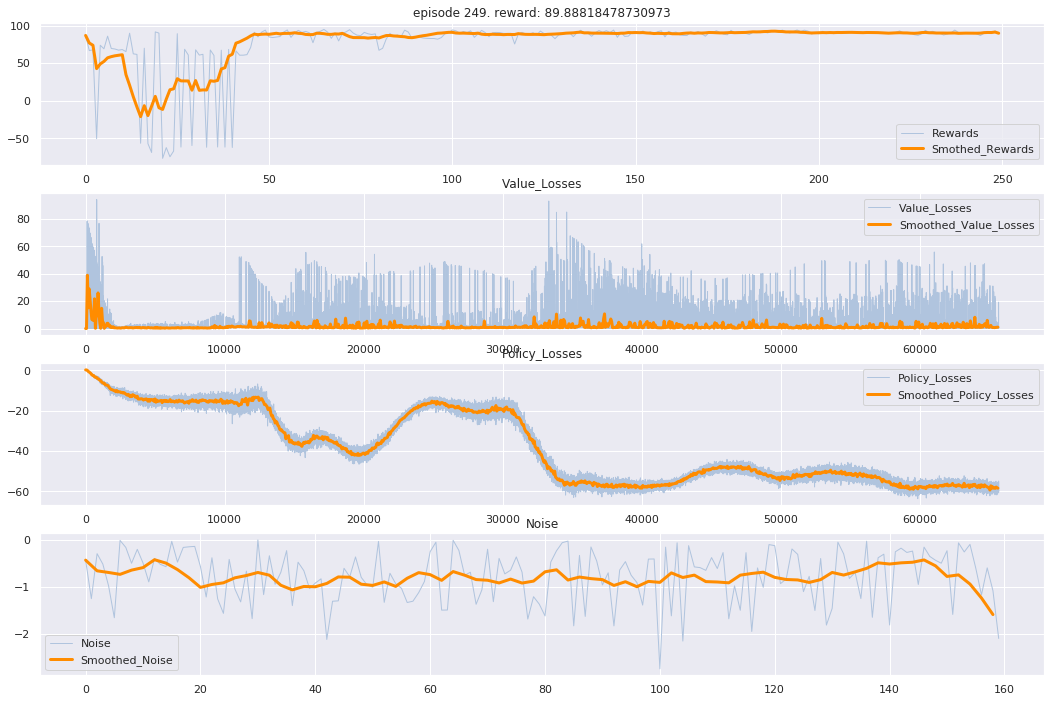

In [10]:
value_losses = []
policy_losses = []
all_rewards = []
updates = 0
test = True

for episode in range(train_episodes):
    state = env.reset()
    ou_noise.reset()
    episode_reward = 0
    noises = []
    for step in range(train_steps):
        action1 = policy_net.get_action(state)
        
#         action = ou_noise.get_action(action1, step)
#         noises.append(action[0][0]-action1[0][0])
        
        # 200 update in 10
        if step % 200 == 0:
            test = not test
        noise = abs(np.random.randn(1)) if test else -abs(np.random.randn(1))
        action = action1 + noise
        noises.append(noise)
        
        next_state, reward, done, _ = env.step(action.flatten())

        replay_buffer.store(state, action, next_state.flatten(), reward, done)
        if len(replay_buffer) > batch_size :
            value_loss, policy_loss = ddpg_train(batch_size)
            value_losses.append(value_loss)
            policy_losses.append(policy_loss)

        state = next_state
        episode_reward += reward

        if done:
            break
        
        updates += 1
    
    all_rewards.append(episode_reward)

    plot(episode, all_rewards, value_losses, policy_losses, noises[:200])

In [11]:
# def run_ddpg(epoch):
    
#     value_losses = []
#     policy_losses = []
#     all_rewards = []
    
#     for episode in range(train_episodes):
#         state = env.reset()
#         ou_noise.reset()
#         episode_reward = 0
#         noises = []
#         for step in range(train_steps):
#             action1 = policy_net.get_action(state)
#     #         noise = np.random.randn(1)
#     #         action = action1 + noise
#     #         noises.append(noise)
#             action = ou_noise.get_action(action1, step)
#             noises.append(action[0][0]-action1[0][0])
#             next_state, reward, done, _ = env.step(action.flatten())

#             replay_buffer.store(state, action, next_state.flatten(), reward, done)
#             if len(replay_buffer) > batch_size :
#                 value_loss, policy_loss = ddpg_train(batch_size)
#                 value_losses.append(value_loss)
#                 policy_losses.append(policy_loss)

#             state = next_state
#             episode_reward += reward

#             if done:
#                 break

#         all_rewards.append(episode_reward)

#         # plot(episode, all_rewards, value_losses, policy_losses, noises[:200])
#     torch.save(policy_net.state_dict(), "./test/DDPG_OUnoise/model_epoch_{}.pth".format(epoch))
#     return all_rewards

# def test_ddpg(epoch):
#     test_rewards = []
#     policy_net_1 = PolicyNetwork(in_dim, out_dim).to(device)
#     policy_net_1.load_state_dict(torch.load("./test/DDPG_OUnoise/model_epoch_{}.pth".format(epoch)))
#     for _ in range(test_episodes):
#         state = env.reset()
#         rewards = 0
#         for _ in range(test_steps):
#             action = policy_net_1.get_action(state.flatten())
#             next_state, reward, done, info = env.step(action)
#             state = next_state
#             rewards += reward
#             if done: break
            
#         test_rewards.append(rewards)
#     return test_rewards

In [12]:
# torch.save(policy_net.state_dict(), "./model/DDPG_for_mountain_car.pth")

In [13]:
# policy_net_1 = PolicyNetwork(in_dim, out_dim).to(device)
# policy_net_1.load_state_dict(torch.load("./model/DDPG_for_mountain_car.pth"))
# policy_net_1.eval()

# import pdb
# import gym
# from IPython import display
# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline

# env = gym.make("MountainCarContinuous-v0")
# state = env.reset()
# img = plt.imshow(env.render(mode='rgb_array')) # only call this once
# for _ in range(1000):
#     img.set_data(env.render(mode='rgb_array')) # just update the data
#     display.display(plt.gcf())
#     display.clear_output(wait=True)
#     policy_net = policy_net.cpu()
    
#     action = policy_net(torch.FloatTensor(state)).detach().numpy()
#     # action = env.action_space.sample()
#     next_state, _, done, _ = env.step(action)
#     if done: 
#         state = env.reset()
#     state = next_state
    
# from gym import wrappers

# env = gym.make("MountainCarContinuous-v0")
# env = wrappers.Monitor(env, "./gym-results/DDPG_mountaincar/", force=True)

Test Results

In [14]:
# import pandas as pd

# train_reward = np.array([])
# test_reward = np.array([])

# for epoch in range(5):
#     # train
    
#     rewards = run_ddpg(epoch)
#     train_reward = np.concatenate((train_reward, rewards))
    
#     # test
    
#     rewards = test_ddpg(epoch)
#     test_reward = np.concatenate((test_reward, rewards))
    
# train_x = lambda : np.arange(1, train_episodes+1)
# train_list = np.stack((train_x() for _ in range(5)), axis=0).flatten()
    
# test_x = lambda : np.arange(1, test_episodes+1)
# test_list = np.stack((test_x() for _ in range(5)), axis=0).flatten()

# train_data = pd.DataFrame(dict(x=train_list, y=train_reward))
# test_data = pd.DataFrame(dict(x=test_list, y=test_reward))

# train_data.to_csv("./test/DDPG_OUnoise/trian_data.csv", index=False)
# test_data.to_csv("./test/DDPG_OUnoise/test_data.csv", index=False)

Plot

In [15]:
# import seaborn as sns; sns.set()
# import matplotlib.pyplot as plt
# import pandas as pd
# DDPG_NO_test_data = pd.read_csv("RL_notes_and_codes/algorithm_implement/test/DDPG_Normalnoise/test_data.csv")
# DDPG_NO_train_data = pd.read_csv("RL_notes_and_codes/algorithm_implement/test/DDPG_Normalnoise/trian_data.csv")
# DDPG_OU_test_data = pd.read_csv("RL_notes_and_codes/algorithm_implement/test/DDPG_OUnoise/test_data.csv")
# DDPG_OU_train_data = pd.read_csv("RL_notes_and_codes/algorithm_implement/test/DDPG_OUnoise/trian_data.csv")

In [16]:
# DDPG_NO_test_data["diff"] = "Normalnoise"
# DDPG_NO_train_data["diff"] = "Normalnoise"
# DDPG_OU_test_data["diff"] = "OUnoise"
# DDPG_OU_train_data["diff"] = "OUnoise"

In [17]:
# DDPG_test_data = pd.concat((DDPG_NO_test_data, DDPG_OU_test_data))
# DDPG_train_data = pd.concat((DDPG_NO_train_data, DDPG_OU_train_data))

In [18]:
# plt.figure(figsize=(16, 8))

# plt.subplot(211)
# ax = sns.lineplot(x="x", y="y", hue="diff", data=DDPG_test_data)
# plt.title("Test 5 times Reward of 100 steps for each episode, Avg: Normalnoise {}, OUnoise {}"
#          .format(round(DDPG_test_data[DDPG_test_data['diff']=="Normalnoise"]['y'].mean(), 3), 
#                 round(DDPG_test_data[DDPG_test_data['diff']=="OUnoise"]['y'].mean(), 3)))
# plt.xlabel("episodes")
# plt.ylabel("rewards")

# plt.subplot(212)
# ax = sns.lineplot(x="x", y="y", hue="diff", data=DDPG_train_data)
# plt.title("Train 5 times Reward of 1000000 steps for each episode, Avg: Normalnoise {}, OUnoise {}"
#          .format(round(DDPG_train_data[DDPG_train_data['diff']=="Normalnoise"]['y'].mean(), 3), 
#                 round(DDPG_train_data[DDPG_train_data['diff']=="OUnoise"]['y'].mean(), 3)))
# plt.xlabel("episodes")
# plt.ylabel("rewards")

# plt.savefig("RL_notes_and_codes/algorithm_implement/test/Noise_test.png")
# plt.show()

![Noise_test.png](./test/Noise_test.png)